# Physics vectors and electrostatic forces
Our first Python warm up introduces some typical calculations involving vectors. Let's just dive in!

The cell below imports a Python module for access to the CERN [ROOT](https://root.cern/) data analysis framework.  This provides many useful tools for analysing and visualizing data in particle physics and other applications.  The "python-verse" is huge and growing rapidly, therefore there are may be numerous packages available to provide similar tools.  

There may be equally good solutions to some problems and differnt programmers will use differnt tools based on preference, convenience, or philosophical grounds.  So you are free to use any modules you like in this class, as long as they are installed in our default working environment on Rivanna. 

Note: that modules may be under rapid develoment in the python-verse and this can lead to compatibility issues between versions of Python or with other modules, therefore it is not expected that arbitrary modules may be cleanly installed in our working environment (or any others) without some expert intervention.

**Advanced** <br>
If you want to see the full package list in our envoronment, type the following command in a code cell:<br>
```!conda list```

**This example begins by importing the ROOT module.**  Notice that the ROOT module was imported as R, therefore any functions, classes, or parameters in that module must be accessed as R.*something*. 

In [1]:
import ROOT as R

Welcome to JupyROOT 6.22/00


Let's begin by making some vectors.   We will use the [TVector3](https://root.cern.ch/doc/master/classTVector3.html) class to represent vectors below. 

![Math buff, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons](https://upload.wikimedia.org/wikipedia/commons/0/07/Spherical_r_theta_phi_coordinates.svg)

For a quick review of Python classes, see https://www.w3schools.com/python/python_classes.asp

Take note:
* ROOT documentation is provided for the underlying C++ interface
* The Python interfaces are very similar to "static" variable declarations in C++.  Don't worry if that terminology is unfamiliar.
* Bottom line: ROOT classes work just like any other class in Python.


In [2]:
# make a vector with (x,y,z) components = (1,2,3)
v1 = R.TVector3(1,2,3)
print("|v1| =", v1.Mag())  # print the magnitude of the vector
print("phi = ", v1.Phi())  # print the angle of the vector in the x-axis in the x-y plane
print("theta = ", v1.Theta())  # print the angle of the vector from the z-axis
v1.Print()

|v1| = 3.7416573867739413
phi =  1.1071487177940904
theta =  0.6405223126794246
TVector3 A 3D physics vector (x,y,z)=(1.000000,2.000000,3.000000) (rho,theta,phi)=(3.741657,36.699225,63.434949)


In [3]:
# Retrieve components
x=v1.X()
y=v1.Y()
z=v1.Z()
print(x,y,z)   # print components using the Python print function

1.0 2.0 3.0


In [4]:
# scale the vector
v1=v1*2
v1.Print()

TVector3 A 3D physics vector (x,y,z)=(2.000000,4.000000,6.000000) (rho,theta,phi)=(7.483315,36.699225,63.434949)


Don't confuse the *method* TVector3.Print() above with Python's print function.  Here the printing is controlled by the vector **class**, not by Python.

In [5]:
#add vectors
v2 = R.TVector3(0.1,0.2,0.3)
v3 = v1+v2
v3.Print()

TVector3 A 3D physics vector (x,y,z)=(2.100000,4.200000,6.300000) (rho,theta,phi)=(7.857481,36.699225,63.434949)


## Exercise 1
Following the example in the class notes use the TVector3 to calculate the forces on the three charges: $F_1, F_2, F_3$
<br>

![](img/example1.png)




In [6]:
# Calculation goes here
# ...
# ...

## Exercise 2

Force vector: F = 1.6 N oriented 110° counter-clockwise from x-axis in the x-y plane (as shown in the class notes).  Calculate the $\hat x$ and $\hat y$ components of the force vector and store the result in a TVector 3 object.  Print the vector.

In [7]:
# Calculation goes here
from math import sin, cos  # we need to import the trig functions for use below
# ...
# ...

## Exercise 3
Let make things a little more interesting.  We define a list of charges in the x-y plane.

In [8]:
from ROOT import TVector3 as V3   # I'm going to be a little lazy about my typing!
# here we make a list of location vectors and a list of charge values
Positions = [V3(.1,.2,0),V3(.2,.4,0),V3(1,.2,0),V3(.7,-.2,0),V3(.4,0,0)]  # in meters
Charges = [10,2,8,-4,12]   # in microcoulombs

Next we'll plot the charges.  This will be demonstrated two ways:<br>
1. Using the [TGraph class](https://root.cern.ch/doc/master/classTGraph.html) in ROOT
<br> All graphs appear on a [TCanvas](https://root.cern.ch/doc/master/classTCanvas.html)
<br> The order of operations is (i) create a canvas (ii) fill the graph to be drawn (iii) draw the graph (iv) draw the canvas
<br> A list of marker types can be found [here](https://root.cern.ch/doc/master/classTAttMarker.html)
2. Using a [bubble plot](https://python-graph-gallery.com/bubble-plot/) in [matplotlib](https://matplotlib.org/)

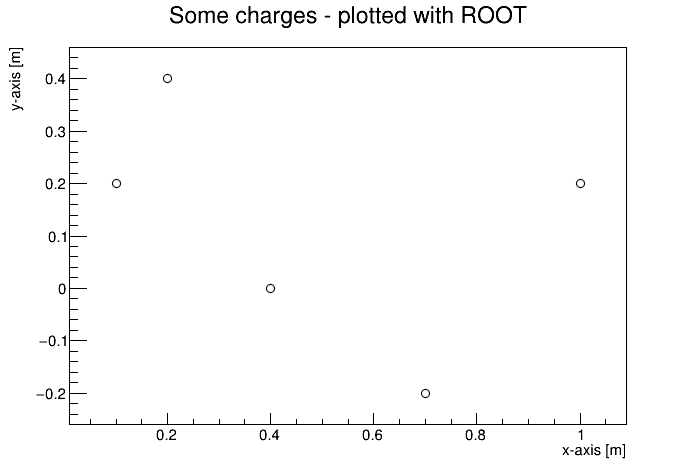

In [9]:
# ROOT TGraph example
tc=R.TCanvas()  # all plots appear on a canvas
tg=R.TGraph()
for i in range(len(Positions)): 
    tg.SetPoint(i,Positions[i].X(),Positions[i].Y())
tg.SetMarkerStyle(R.kCircle)
tg.SetTitle("Some charges - plotted with ROOT;x-axis [m];y-axis [m]")
tg.Draw('ap')  # 'a' means draw the axes, 'p' means use the (poly)marker above
               # always use 'a' unless you want to place you graph on top of an existing plot
tc.Draw()

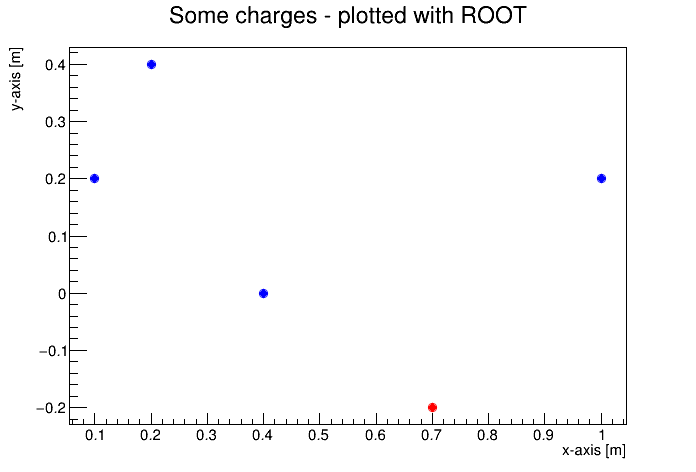

In [10]:
# ROOT TGraph example 2 coloring the points
# Here we create two graphs, one for + and one for - charges
# The graphs are combined in a TMultiGraph https://root.cern.ch/doc/master/classTMultiGraph.html
# The TMultiGraph will automatically calculate the plotting range, such that all the graphs are visible
tgplus=R.TGraph()
tgminus=R.TGraph()
for i in range(len(Positions)):
    if Charges[i]>0:
        tgplus.SetPoint(tgplus.GetN(),Positions[i].X(),Positions[i].Y())
    else: 
        tgminus.SetPoint(tgminus.GetN(),Positions[i].X(),Positions[i].Y())
tgplus.SetMarkerStyle(R.kFullCircle)
tgplus.SetMarkerColor(R.kBlue)
tgminus.SetMarkerStyle(R.kFullCircle)
tgminus.SetMarkerColor(R.kRed)
tm=R.TMultiGraph()
tm.SetTitle("Some charges - plotted with ROOT;x-axis [m];y-axis [m]")
tm.Add(tgplus)
tm.Add(tgminus)
tm.Draw('ap')
tc.Draw()

For the matplotlib example we will put the data into [numpy](https://numpy.org/) arrays and make a [scatter plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html?highlight=scatter#matplotlib.pyplot.scatter).  This one will be a little more fancy with the sizes of the dots reflecting the charge, but it's also a lot more effort!

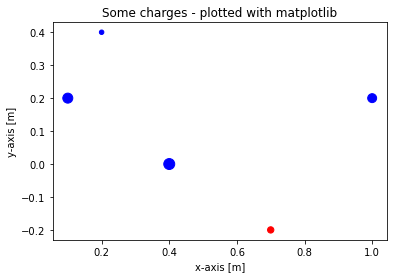

In [11]:
#matplotlib example
import matplotlib.pyplot as plt
import numpy as np
x = np.empty(len(Positions)) 
y = np.empty(len(Positions))
s = np.empty(len(Positions))
c = []
for i in range(len(Positions)): 
    x[i]=Positions[i].X()
    y[i]=Positions[i].Y()
    if Charges[i]<0: c.append("red")
    else: c.append("blue")
    s[i]=abs(Charges[i])*10
    
# Add titles (main and on axis)
plt.xlabel("x-axis [m]")
plt.ylabel("y-axis [m]")
plt.title("Some charges - plotted with matplotlib")
plt.scatter(x, y, s, c);     # the optional ; here is a trick to suppress an output message from the plotter

If there is a moral to the above story, it should be "Keep it Simple".  The code for the first graph is far easier to understand with a quick glance.  Making the other graphs requires more hunting around the documentation.  There are many options to explore in any graphing package.  In general, when you are working on a problem, opt for the most basic / easiest plots you can make to provide useful information.  Then you can beautify a small set of final plots after the main work is finished.  

**Back to our exercise**

Now calculate the components of the force on the *negative* (<font color="red">red</font>) charge in the collection above.

In [12]:
# let's define some symbols to make our prinout look nice below
ihat='i\u0302'
jhat='j\u0302'

In [13]:
# Calculation goes here
Fx=0
Fy=0
# ...
# ...
print("F =",Fx,ihat,"+",Fy,jhat)  # use this print statement w/ the proper values added

F = 0 î + 0 ĵ


# Exercise 4
Consider the following charge distribution.  Note the positions are being specified using numpy arrays.

In [14]:
# define (x,y) locations and charges of our distribution
x=np.linspace(-5, 5, 401)  # x locations spread out from -5 to + 5
y=x*0                      # y locations are all at 0
q=y+1  # microcolumbs      # all charge values are set to 1 uC
#print(x)

Place a charge $q=3.0\,\mu$C at the location (0,0.1)m<br>
Make a plot of the charges in the problem and calculate the force on $q$. <br>
Bonus step: See if you can draw an arrow from $q$ pointing in the directions of the force.

In [15]:
# Calculation and plotting code goes here (be careful with your units)
# ...
# ...
print("F =",Fx,ihat,"+",Fy,jhat)  # use this print statement w/ the proper values added

F = 0 î + 0 ĵ
